In [2]:
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,SpatialDropout2D
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np

# Importing CIFAR 10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# train split to validation
x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.2)

train_x = x_train1.astype('float32') / 255 
valid_x = x_valid.astype('float32') / 255
test_x = x_test.astype('float32') / 255

print(y_train1.shape)

N = 10

# One-hot encoding
train_y = to_categorical(y_train1, N)
valid_y = to_categorical(y_valid, N)
test_y = to_categorical(y_test, N)
print(train_y.shape)
print(train_x.shape)
print(valid_x.shape)
print(test_x.shape)

170500096/170498071 [==============================] - 6s 0us/step
(40000, 1)
(40000, 10)
(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
def Model():
  
    Alex_model = Sequential()
    
    Alex_model.add(Conv2D(64, kernel_size=(3,3), strides = 1, padding='same', activation='relu', input_shape=(32, 32, 3))) # 1st Layer
    Alex_model.add(SpatialDropout2D(rate=0.4))
    Alex_model.add(MaxPooling2D(pool_size=(2,2),  strides = 2, padding='same'))
    
    Alex_model.add(Conv2D(192, kernel_size=(3,3), strides = 1, padding='same', activation='relu'))       # 2nd Layer
    Alex_model.add(SpatialDropout2D(rate=0.4))
    Alex_model.add(MaxPooling2D(pool_size=(2,2),  strides = 2))
    
    Alex_model.add(Conv2D(384, kernel_size=(3,3), strides = 1, padding='same', activation='relu'))       # 3rd Layer
    Alex_model.add(SpatialDropout2D(rate=0.4))
    Alex_model.add(MaxPooling2D(pool_size=(2,2),  strides = 2))
    
    Alex_model.add(Conv2D(256, kernel_size=(3,3), strides = 1, padding='same', activation='relu'))       # 4th Layer
    Alex_model.add(SpatialDropout2D(rate=0.4))
    Alex_model.add(MaxPooling2D(pool_size=(2,2),  strides = 2))
    
    Alex_model.add(Conv2D(256, kernel_size=(3,3), strides = 1, padding='same', activation='relu'))       # 5th Layer
    Alex_model.add(SpatialDropout2D(rate=0.4))
    Alex_model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
    
    Alex_model.add(Flatten())
    
    Alex_model.add(Dense(4096, activation='relu'))                     # 6th Layer
    Alex_model.add(Dropout(rate=0.5))
    
    Alex_model.add(Dense(4096, activation='relu'))                     # 7th Layer
    Alex_model.add(Dropout(rate=0.5))
    
    Alex_model.add(Dense(10,activation='softmax'))                     # 8th Layer
    return Alex_model


Alex_model = Model()
Alex_model.compile(loss='categorical_crossentropy',
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['accuracy'])
Alex_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 192)       110784    
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 16, 16, 192)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 192)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 384)         6

In [4]:
# verbose = progress bar setting
history = Alex_model.fit(train_x, train_y, batch_size=128, epochs=50, verbose=1, validation_data=(valid_x, valid_y))

Epoch 1/50
313/313 [==============================] - 14s 21ms/step - loss: 2.1325 - accuracy: 0.1775 - val_loss: 1.6976 - val_accuracy: 0.3322
Epoch 2/50
313/313 [==============================] - 6s 18ms/step - loss: 1.7723 - accuracy: 0.3256 - val_loss: 1.5142 - val_accuracy: 0.4473
Epoch 3/50
313/313 [==============================] - 6s 18ms/step - loss: 1.6471 - accuracy: 0.3874 - val_loss: 1.4522 - val_accuracy: 0.4880
Epoch 4/50
313/313 [==============================] - 6s 18ms/step - loss: 1.5646 - accuracy: 0.4263 - val_loss: 1.3729 - val_accuracy: 0.5044
Epoch 5/50
313/313 [==============================] - 6s 18ms/step - loss: 1.5028 - accuracy: 0.4470 - val_loss: 1.3106 - val_accuracy: 0.5177
Epoch 6/50
313/313 [==============================] - 6s 18ms/step - loss: 1.4602 - accuracy: 0.4682 - val_loss: 1.3014 - val_accuracy: 0.5227
Epoch 7/50
313/313 [==============================] - 6s 18ms/step - loss: 1.4091 - accuracy: 0.4937 - val_loss: 1.1792 - val_accuracy: 0.577

In [5]:
score = Alex_model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.872353196144104
Test accuracy: 0.7148000001907349


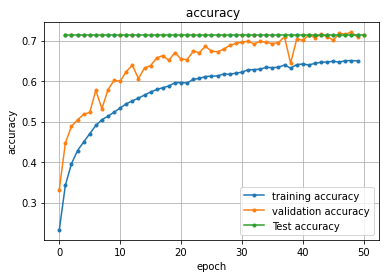

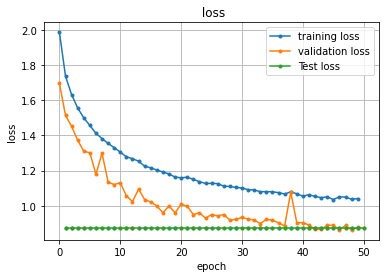

In [6]:
test_accuracy=np.array([np.ones((50))*score[1]])
test_loss=np.array([np.ones((50))*score[0]])
epoch=np.array([np.linspace(1,50,50)])


# Accuracy plots
plt.plot(history.history['accuracy'], marker='.', label='training accuracy')
plt.plot(history.history['val_accuracy'], marker='.', label='validation accuracy')
plt.plot(epoch,test_accuracy, marker='.')
plt.plot(epoch[0],test_accuracy[0], marker='.', label='Test accuracy')
plt.title(' accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.savefig('Task2_accuracyV3.jpeg')
plt.show()

# Loss plots
plt.plot(history.history['loss'], marker='.', label='training loss')
plt.plot(history.history['val_loss'], marker='.', label='validation loss')
plt.plot(epoch,test_loss, marker='.')
plt.plot(epoch[0],test_loss[0], marker='.',label='Test loss')
plt.title(' loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.savefig('Task2_lossV3.jpeg')
plt.show()